<a href="https://colab.research.google.com/github/hxnnxh-blip/data-cleaning/blob/main/DataCleaning_%5Bhotel_bookings_3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

import pandas as pd

In [ ]:
#Read csv file

dataset = pd.read_csv('hotel_bookings 3.csv')
df= dataset.copy()

In [ ]:
print (df)

               hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...           Check-Out               201

In [ ]:
#Find the missing values
print(df.isnull().sum().sort_values(ascending=False)[:10])

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64


In [ ]:
print(df[['company','agent']].dtypes)   #get column type

company    float64
agent      float64
dtype: object


In [ ]:
## If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [ ]:
print(df['country'].dtypes)   #get column type

object


In [ ]:
## For the missing values in the country column, replace it with mode
df['country'].fillna(str(df.country.mode().values), inplace=True)

In [ ]:
a = str(df.country.mode().values)
print (a)

['PRT']


In [ ]:
print(df['children'].dtypes)   #get column type

float64


In [ ]:
## for missing children value, replace it with rounded mean value
df['children'].fillna(round(df.children.mean()), inplace=True)

In [ ]:
#check if their are no guests
is_guest = df[(df.adults+df.children+df.babies)==0].shape
print(is_guest)

(180, 32)


In [ ]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [ ]:
print (dataset.shape)
print (df.shape)

(119390, 32)
(119210, 32)


In [ ]:
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
## convert datatype from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
print(df.isnull().sum().sort_values(ascending=False)[:10])

reservation_status_date      0
reservation_status           0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
dtype: int64


Query

In [ ]:
# Bookings cancelled

count_val = df['is_canceled'].value_counts()

x = count_val.index.values
y = (count_val/count_val.sum()*100).values

print (x,y)

[0 1] [62.92341247 37.07658753]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Booking (%)'),
 Text(0.5, 0, 'Booking Cancelled (No = 0, Yes = 1)')]

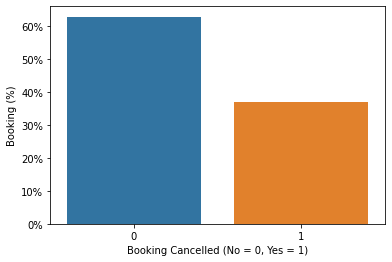

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
#plot data
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plot_val = sns.barplot(x,y)
ax.set(xlabel='Booking Cancelled (No = 0, Yes = 1)', ylabel='Booking (%)')

Feature Scalling

In [ ]:
df_subset = df.copy()
print(df_subset)

               hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...           Check-Out               201

In [ ]:
print(df_subset[['reserved_room_type','assigned_room_type']])

       reserved_room_type assigned_room_type
0                       C                  C
1                       C                  C
2                       A                  C
3                       A                  A
4                       A                  A
...                   ...                ...
119385                  A                  A
119386                  E                  E
119387                  D                  D
119388                  A                  A
119389                  A                  A

[119210 rows x 2 columns]


In [ ]:
## new column room which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## new column net cancelled which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1


In [ ]:
## Remove the less important columns
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)

In [ ]:
print(df.shape)
print(df_subset.shape)

(119210, 32)
(119210, 24)


In [ ]:
## Remove reservation_status column because it tells us if booking was cancelled 
df_subset = df_subset.drop(['reservation_status'], axis=1)

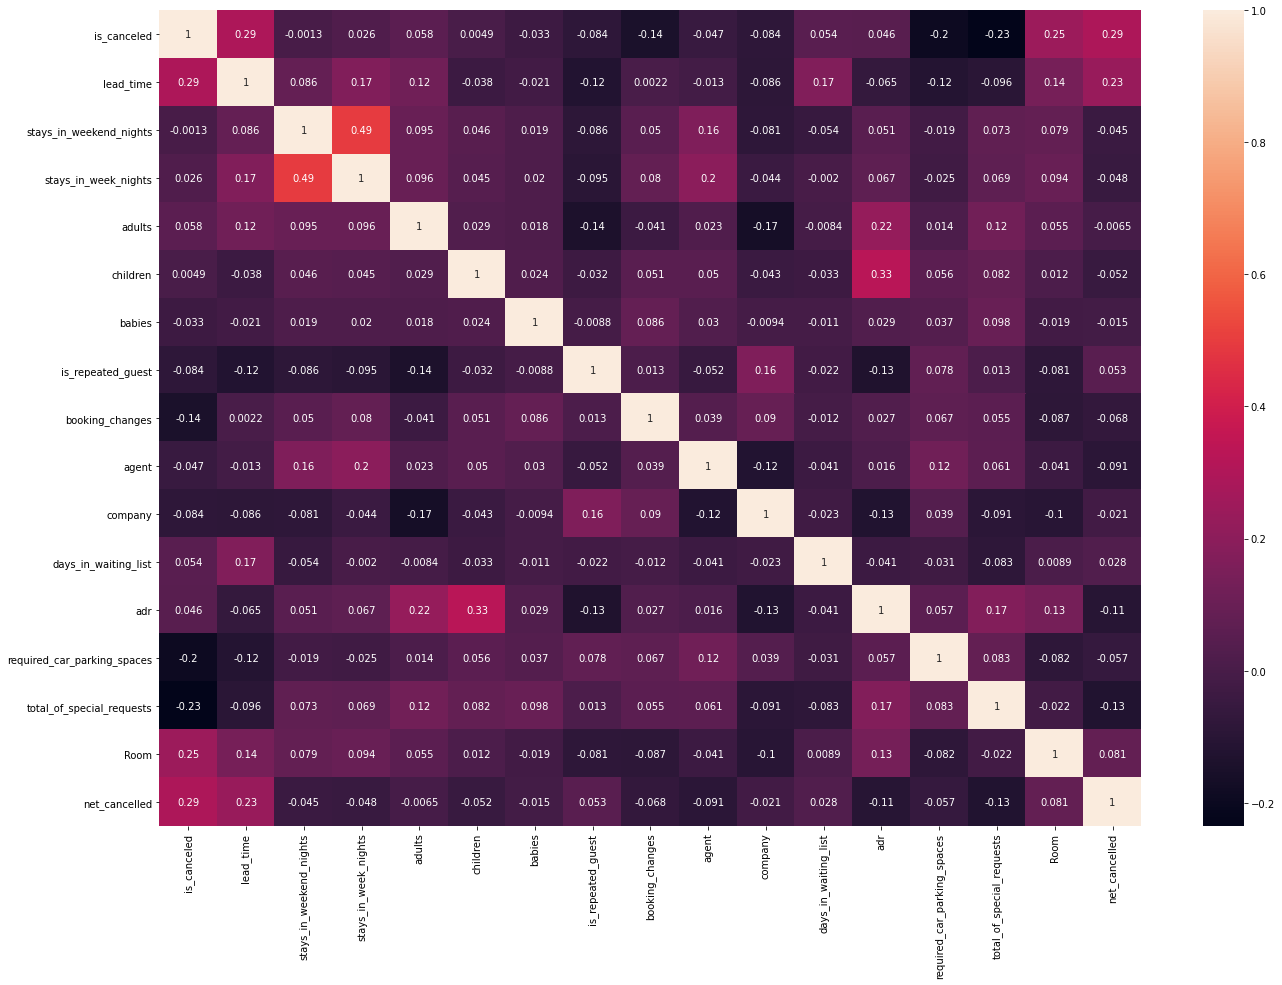

In [ ]:
## Plot the heatmap to see correlation with columns
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

Modeling

In [ ]:
categorical_features = list(df_subset.columns[df_subset.dtypes == object])
print(categorical_features)

['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']


In [ ]:
def transform(dataframe):
    
    ## Import LabelEncoder from sklearn
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    
    ## Select all categorcial features
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])

    dataframe[categorical_features] = dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

    ## Apply Label Encoding on all categorical features
    return dataframe

#pass the dataset in the function
final_df = transform(df_subset)

In [ ]:
print(final_df['company'].unique())

[  0 110 113 270 178 240 154 144 307 268  59 204 312 318  94 274 174 195
 223 317 281 118  53 286  12  47 324 342 373 371  86  82 218  88  31 397
 392 405 331 367  20  83 416  51 395 102  34  84 360 394 457 382 461 478
 112 486 421   9 308 135 224 504 269 356 498 390 513 203 263 477 521 169
 515 445 337 251 428 292 388 130 250 355 254 543 531 528  62 120  42  81
 116 530 103  39  16  92  61 501 165 291 290  43 325 192 108 200 465 287
 297 490 482 207 282 437 225 329 272  28  77 338  72 246 319 146 159 380
 323 511 407 278  80 403 399  14 137 343 346 347 349 289 351 353  54  99
 358 361 362 366 372 365 277 109 377 379  22 378 330 364 401 232 255 384
 167 212 514 391 400 376 402 396 302 398   6 370 369 409 168 104 408 413
 148  10 333 419 415 424 425 423 422 435 439 442 448 443 454 444  52 459
 458 456 460 447 470 466 484 184 485  32 487 491 494 193 516 496 499  29
  78 520 507 506 512 126  64 242 518 523 539 534 436 525 541  40 455 410
  45  38  49  48  67  68  65  91  37   8 179 209 21

In [ ]:
print(final_df.dtypes)

hotel                            int64
is_canceled                      int64
lead_time                        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
meal                             int64
country                          int64
market_segment                   int64
distribution_channel             int64
is_repeated_guest                int64
booking_changes                  int64
deposit_type                     int64
agent                            int64
company                          int64
days_in_waiting_list             int64
customer_type                    int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
Room                             int64
net_cancelled                    int64
dtype: object


In [ ]:
# Split the dataset into train and test. The default size of the split ratio is 3:1

def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test



x_train, x_test, y_train, y_test = data_split(final_df, 'is_canceled')

In [ ]:
# Machine Learning Model (Decision Tree)

def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf


clf = train(x_train, y_train)

In [ ]:
#Evaluate the model

def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print(f'Training Accuracy:  {train_score}')
    print(f'Test Accuracy:      {test_score}')
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy:  0.9956043710224032
Test Accuracy:      0.9956043710224032


In [ ]:
## Getting Prediciton of n record of x_train
prediction = clf.predict(x_train.iloc[10].values.reshape(1,-1))

## Actual Value of n record of x_train from y_train
actual_value = y_train.iloc[10]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 0
Actual Value		: 0


In [ ]:
final_df.to_csv('final_hotel_booking.csv',index=False)